# Tower of Hanoi Dot Matrix Display
This project calculates the number of steps required to solve the Tower of Hanoi puzzle for a given number of disks and displays the result on a custom-width dot matrix display. The display mimics LED sea markers and uses a circular disc for each dot. The project also includes a bonus section for solving the Cyclic Hanoi puzzle.

## Features:
- Calculate steps to solve Tower of Hanoi
- Generate dot matrix display for visual representation
- Support for grayscale dot matrix images



## Installation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Usage

1. Run the main script:
    ```bash
    python main.py
    ```
2. Enter the number of disks when prompted.
3. The program will display the number of steps required and generate a dot matrix image.



In [ ]:
def draw_towerofhanoi(disks):
    dot_radius = 25
    dot_height = 300 #constants

    display_width = disks * (2 * dot_radius + 5) #to calculate display width based on number of disks

    dot_matrix = np.zeros((dot_height, display_width), dtype=np.uint8) #empty dot matrix

    #putting values in dot matrix
    for i in range(disks):
        disk_radius = dot_radius + (disks - i - 1) * 30
        x_position = (i * (2 * dot_radius + 5)) + dot_radius
        y_position = dot_height - dot_radius

        y, x = np.ogrid[-dot_radius:dot_radius, -dot_radius:dot_radius] #to make a circular mask
        mask = x**2 + y**2 <= dot_radius**2

        y_start, y_end = y_position - dot_radius, y_position + dot_radius #region to update in dot matrix
        x_start, x_end = x_position - dot_radius, x_position + dot_radius

        dot_matrix[y_start:y_end, x_start:x_end] = np.maximum(dot_matrix[y_start:y_end, x_start:x_end], mask * 255) #to update dotmatrix using the circular mask

    return dot_matrix

In [ ]:
def main():
    num_disks = int(input("Enter the number of disks: "))

    if num_disks < 1:
        print("Number of disks must be 1 or greater.")
        return

    steps = 2**num_disks - 1

    print(f"To solve Tower of Hanoi with {num_disks} disks, it will take {steps} steps.")

    dot_matrix_image = draw_towerofhanoi(num_disks)

    plt.imshow(dot_matrix_image, cmap='gray')
    plt.title(f"Dot Matrix Display - {num_disks} Disks")
    plt.axis('off') #so that there are no numbers on axes
    plt.show()

Enter the number of disks: 7
To solve Tower of Hanoi with 7 disks, it will take 127 steps.


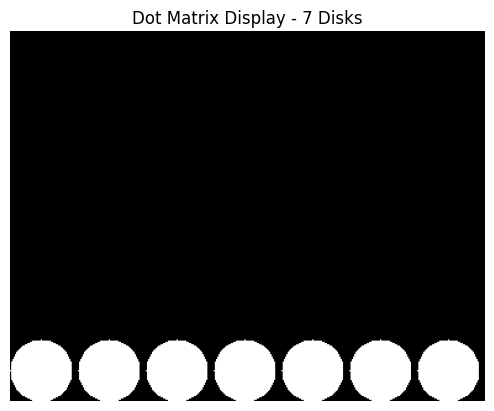

In [ ]:
if __name__ == "__main__":
    main()